<a href="https://colab.research.google.com/github/kokot123-dev/MISP/blob/main/zaj7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Zajęcia z uczenia maszynowego

[link realizowanego tutoriala](https://www.kaggle.com/learn/intro-to-machine-learning)

Na tym zajęciach realizowaliśmy jeden z tutoriali dostepnych na stronie kaggle.com. aby zapoznać się z działaniem algorytmów uczenia maszynowego.

**Poniższe kody działają w notatniku Kaggle.com, w środowisku Google Colab nie kompilują się**

# Lekcja 2

Podczas tej lekcji, poznawaliśmy sposób wgrywania plików do notatnika oraz sposób wyświetlania statystyk o wgranych danych

In [ ]:
#lesson 2
import pandas as pd

# Ścieżka do pliku do odczytania
iowa_file_path = '../input/home-data-for-ml-course/train.csv'

# wczytanie pliku do zmiennej
home_data = pd.read_csv(iowa_file_path)

# średnia wielkość działki
avg_lot_size = round(home_data["LotArea"].mean())

# najmłodszy dom 
newest_home_age = pd.Timestamp('today').year - home_data["YearBuilt"].max()

#odpowiedzi
avg_lot_size = 10517
newest_home_age = 10

# Lekcja 3

Podczas tej lekcji poznaliśmy pojęcia "cel prognozy" i "funkcji" , zbudowaliśmy model typu drzewo decyzyjne oraz poznaliśmy funkcje przewidywania


In [ ]:
#lesson 3

import pandas as pd

iowa_file_path = '../input/home-data-for-ml-course/train.csv'

home_data = pd.read_csv(iowa_file_path)

# Sprawdzanie kodu
from learntools.core import binder
binder.bind(globals()) #konfiguracja
from learntools.machine_learning.ex3 import *

print("Setup Complete")

# cel prognozy => cena
y = home_data.SalePrice

# lista "funkcji"
feature_names = ["LotArea", "YearBuilt", "1stFlrSF", "2ndFlrSF",
                      "FullBath", "BedroomAbvGr", "TotRmsAbvGrd"]

# nadanie nazwy X
X = home_data[feature_names]

# zdefiniowanie modelu
from sklearn.tree import DecisionTreeRegressor
iowa_model = DecisionTreeRegressor(random_state=1)
# dopasowanie modelu
iowa_model.fit(X, y)

# funkcja przewidująca
predictions = iowa_model.predict(X)
print(predictions)


[208500. 181500. 223500. ... 266500. 142125. 147500.]

# Lekcja 4

Podczas tej lekcji wykorzystywaliśmy walidacje modelu aby określić dokładność działania modelu

In [ ]:
#lesson 4

import pandas as pd
from sklearn.tree import DecisionTreeRegressor

iowa_file_path = '../input/home-data-for-ml-course/train.csv'

home_data = pd.read_csv(iowa_file_path)
y = home_data.SalePrice
feature_columns = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
X = home_data[feature_columns]

iowa_model = DecisionTreeRegressor()

iowa_model.fit(X, y)

print("First in-sample predictions:", iowa_model.predict(X.head()))
print("Actual target values for those homes:", y.head().tolist())

from learntools.core import binder
binder.bind(globals())
from learntools.machine_learning.ex4 import *
print("Setup Complete")



First in-sample predictions: [208500. 181500. 223500. 140000. 250000.]

Actual target values for those homes: [208500, 181500, 223500, 140000, 250000]

In [ ]:
# podział danych na treningowe i walidacyjne 
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
step_1.check()

# utwórz i dopasuj model
iowa_model = DecisionTreeRegressor(random_state=1)
iowa_model.fit(train_X, train_y)


[186500. 184000. 130000.  92000. 164500. 220000. 335000. 144152. 215000.
 262000.]
 
[186500. 184000. 130000.  92000. 164500. 220000. 335000. 144152. 215000.
 262000.]

In [ ]:
# funkcja przewidująca
val_predictions = iowa_model.predict(val_X)

# sprawdzenie prognozy i real danych
print(val_X)
print(val_predictions)

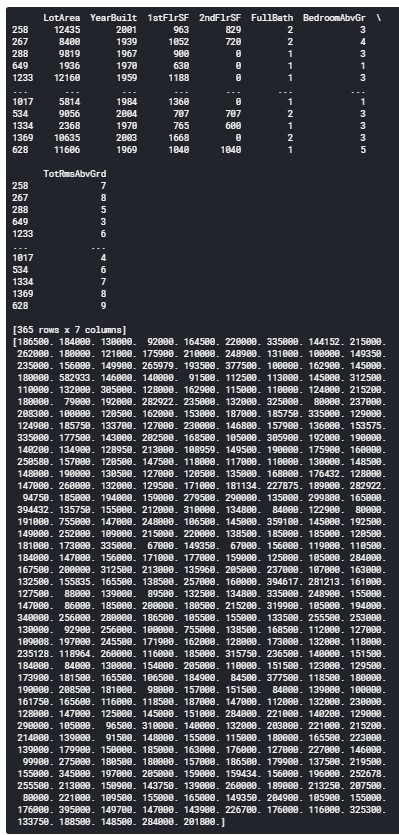

In [ ]:
# wyliczenie MAE
from sklearn.metrics import mean_absolute_error
val_mae = mean_absolute_error(val_predictions, val_y)
print(val_mae)

29652.931506849316

# Lekcja 5

Podczas tej lekcji poznaliśmy pojęcia niedopasowania i nadmiernego dopasowania modeli oraz sposoby zwiększania dokładności modeli

In [ ]:
#lesson 5

import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

iowa_file_path = '../input/home-data-for-ml-course/train.csv'

home_data = pd.read_csv(iowa_file_path)
y = home_data.SalePrice
features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
X = home_data[features]

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

iowa_model = DecisionTreeRegressor(random_state=1)
iowa_model.fit(train_X, train_y)

val_predictions = iowa_model.predict(val_X)
val_mae = mean_absolute_error(val_predictions, val_y)
print("Validation MAE: {:,.0f}".format(val_mae))

from learntools.core import binder
binder.bind(globals())
from learntools.machine_learning.ex5 import *
print("\nSetup complete")

Validation MAE: 29,653

Setup complete

In [ ]:
# funkcja get_mae
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

## porównanie dokładnośći modeli drzew o różnym rozmiarze
candidate_max_leaf_nodes = [5, 25, 50, 100, 250, 500]
# pętla zapisu i określenie najlepszego wymiaru
scores = {leaf_size: get_mae(leaf_size, train_X, val_X, train_y, val_y) for leaf_size in candidate_max_leaf_nodes}
best_tree_size = min(scores, key=scores.get)

# najlepsza wartość = 100
best_tree_size = 100

# model z rozmiarem drzewa = 100
final_model = DecisionTreeRegressor(max_leaf_nodes=best_tree_size, random_state=1)
final_model.fit(X, y)

# Lekcja 6

Podczas tej lekcji poznaliśmy model "lasu"

In [ ]:
#lesson 6

import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

iowa_file_path = '../input/home-data-for-ml-course/train.csv'

home_data = pd.read_csv(iowa_file_path)
y = home_data.SalePrice
features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
X = home_data[features]

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

iowa_model = DecisionTreeRegressor(random_state=1)
iowa_model.fit(train_X, train_y)

val_predictions = iowa_model.predict(val_X)
val_mae = mean_absolute_error(val_predictions, val_y)
print("Validation MAE when not specifying max_leaf_nodes: {:,.0f}".format(val_mae))

iowa_model = DecisionTreeRegressor(max_leaf_nodes=100, random_state=1)
iowa_model.fit(train_X, train_y)
val_predictions = iowa_model.predict(val_X)
val_mae = mean_absolute_error(val_predictions, val_y)
print("Validation MAE for best value of max_leaf_nodes: {:,.0f}".format(val_mae))

from learntools.core import binder
binder.bind(globals())
from learntools.machine_learning.ex6 import *
print("\nSetup complete")

Validation MAE when not specifying max_leaf_nodes: 29,653

Validation MAE for best value of max_leaf_nodes: 27,283

Setup complete

In [ ]:
## model losowego lasu
from sklearn.ensemble import RandomForestRegressor

# definicja
rf_model = RandomForestRegressor()

# dopasowanie
rf_model.fit(train_X, train_y)

# wartość MAE
rf_val_predictions = rf_model.predict(val_X)
rf_val_mae = mean_absolute_error(rf_val_predictions, val_y)

print("Validation MAE for Random Forest Model: {}".format(rf_val_mae))


Validation MAE for Random Forest Model: 22283.856268754076

# Lekcja 7

Podczas tej lekcji utworzyliśmy i przesłaliśmy zgłoszenie do konkursu Kaggle 

In [ ]:
#lesson 7

import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

import os
if not os.path.exists("../input/train.csv"):
    os.symlink("../input/home-data-for-ml-course/train.csv", "../input/train.csv")  
    os.symlink("../input/home-data-for-ml-course/test.csv", "../input/test.csv") 
from learntools.core import binder
binder.bind(globals())
from learntools.machine_learning.ex7 import *

iowa_file_path = '../input/train.csv'

home_data = pd.read_csv(iowa_file_path)
y = home_data.SalePrice
features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
X = home_data[features]

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

iowa_model = DecisionTreeRegressor(random_state=1)
iowa_model.fit(train_X, train_y)

val_predictions = iowa_model.predict(val_X)
val_mae = mean_absolute_error(val_predictions, val_y)
print("Validation MAE when not specifying max_leaf_nodes: {:,.0f}".format(val_mae))

iowa_model = DecisionTreeRegressor(max_leaf_nodes=100, random_state=1)
iowa_model.fit(train_X, train_y)
val_predictions = iowa_model.predict(val_X)
val_mae = mean_absolute_error(val_predictions, val_y)
print("Validation MAE for best value of max_leaf_nodes: {:,.0f}".format(val_mae))

rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(train_X, train_y)
rf_val_predictions = rf_model.predict(val_X)
rf_val_mae = mean_absolute_error(rf_val_predictions, val_y)

print("Validation MAE for Random Forest Model: {:,.0f}".format(rf_val_mae))

Validation MAE when not specifying max_leaf_nodes: 29,653
Validation MAE for best value of max_leaf_nodes: 27,283
Validation MAE for Random Forest Model: 21,857

In [ ]:
rf_model_on_full_data = RandomForestRegressor()
rf_model_on_full_data.fit(X, y)

RandomForestRegressor()

In [ ]:
test_data_path = '../input/test.csv'

test_data = pd.read_csv(test_data_path)

test_X = test_data[features]


test_preds = rf_model_on_full_data.predict(test_X)

# przesłanie rozwiązania
output = pd.DataFrame({'Id': test_data.Id,                      'SalePrice': test_preds})
output.to_csv('submission.csv', index=False)

Przesłane rozwiązanie 

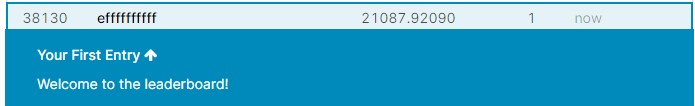